# Cuaderno para el análisis de diversidad funcional de comunidades vegetales
Juan Pablo Benavides Tocarruncho

## Introducción
Los ecosistemas son importantes porque pueden entenderse como proveedores de servicios y recursos naturales para la sociedad. Dentro de las diferentes aproximaciones para entender el funcionamiento de los ecosistemas está el estudio de la diversidad funcional. Este tipo de estudios se basan en los rasgos de las especies. Un rasgo es una característica (como la altura, el area de una hoja) que se mide en un individuo y que se usa para caracterizar las especies presentes en un ecosistema. Los rasgos son **funcionales** cuando se relacionan con los procesos del ecosistema. 


Trabajar con rasgos funcionales suele ser complejo porque los estudios de ecología funcional requieren usar un gran número de individuos y especies y medir una buena cantidad de rasgos (variables) y en diferentes condiciones (tratamientos). Existen muchos paquetes, librerías, programas, etc. que permiten a los investigadores analisar estos datos. No obstante, los diferentes métodos, como el análisis de componentes principales, análisis de varianza multivarada, entre otros, son utilizados indiscriminadamente por los paquetes sin entender el significado ecológico de los procedimientos matemáticos. Un ejemplo de ello es cuando no se tiene en cuenta la abundancia en estos tipos de análisis.

### Objetivos: 
* Realizar un análisis de componentes principales con una matriz de datos proveniente de una base de datos de libre acceso y así calcular índices de diversidad funcional
* Obtener una salida para cada procedimiento y así entender los diferentes significados ecológicos en el análisis
* Deterinar un modelo de probabilidad de densidad de kernel (KPD) o modedelo de densidad de probabilidad del rasgo (TPD) que determine los nichos funcionales más abundantes

# Procedimiento

## Obtención de datos
### Exportación de la base de datos
1. Se especifica la dirección del archivo .csv donde estará la matriz de datos en la variable ``path``
>Para este caso usaremos un archivo de prueba para datos de arboles de bosque seco Colombiano que se llama ``Try2020112923247120.csv``
>
>Estos datos son de Thomas et al. (2017) y se encuentran en [TRY-DB](https://www.try-db.org/TryWeb/Data.php#27). Este archivo es directamente descargado de la base de datos.
2. Para extraer los datos del archivo se usará la librería ``pandas``


In [1]:
path = input("Ingrese el la dirección del archivo") #"Try2020112923247120.csv"
delim = input("Delimitador de datos ")
dec = input("Delimitador de decimales ")
encode = input("Puede colorcar la codificación estandar ")
import pandas
 
if encode != "": data = pandas.read_csv(path, encoding=encode)
else: data = pandas.read_csv(path, delimiter=delim, decimal=dec)
    
data

Ingrese el la dirección del archivo Try2020112923247120.csv
Delimitador de datos  ,
Delimitador de decimales  .
Puede colorcar la codificación estandar  latin-1


,x,z,Municipality,collection data,BioRegion,Site,species,individualnumberpersite,ColectionNumber,NumberSoilSample,...,leaffreshweight_g,leafdryweight_g,Foliararea_cm2,petiolearea,vol_core_cm3,dryweight_core_g,wooddensity_core_g/cm3,vol_branch_cm3,dryweight_branch_g,wooddensity_branch
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,g,g,cm2,cm2,cm3,g,g/cm3,cm3,g,g/cm3
1,-75.833500,6.526028,Santa Fe de Antioquia,24-07-14,Valle del Cauca,SFE,Bursera simaruba,1,CMR002,1,...,4.33,1.42,233.141,NaN,0.62,1.87,3.02,4.74,1.79,0.38
2,-75.833500,6.526028,Santa Fe de Antioquia,24-07-14,Valle del Cauca,SFE,Bursera simaruba,1,CMR002,1,...,4.3,1.32,238.691,NaN,0.62,1.87,3.02,4.74,1.79,0.38
3,-75.833500,6.526028,Santa Fe de Antioquia,24-07-14,Valle del Cauca,SFE,Bursera simaruba,1,CMR002,1,...,5.17,1.66,317.101,NaN,0.62,1.87,3.02,4.74,1.79,0.38
4,-75.833500,6.526028,Santa Fe de Antioquia,24-07-14,Valle del Cauca,SFE,Bursera simaruba,1,CMR002,1,...,4.96,1.6,266.302,NaN,0.62,1.87,3.02,4.74,1.79,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3814,-74.872694,10.051944,El Guamo,01-09-15,Caribe,GUA,Astronium graveolens,11,GUA-SP17-11,NaN,...,0.27,0.66,136.126,NaN,1.03,0.68,0.66,1.97,1.33,0.68
3815,-74.872694,10.051944,El Guamo,01-09-15,Caribe,GUA,Astronium graveolens,11,GUA-SP17-11,NaN,...,0.28,0.51,101.443,NaN,1.03,0.68,0.66,1.97,1.33,0.68
3816,-74.872694,10.051944,El Guamo,01-09-15,Caribe,GUA,Astronium graveolens,11,GUA-SP17-11,NaN,...,0.55,0.94,144.172,NaN,1.03,0.68,0.66,1.97,1.33,0.68
3817,-74.872694,10.051944,El Guamo,01-09-15,Caribe,GUA,Astronium graveolens,11,GUA-SP17-11,NaN,...,0.34,0.65,130.786,NaN,1.03,0.68,0.66,1.97,1.33,0.68


Como se obtiene una matriz muy grande (3817 registros de individuos) se debe filtrar la información. 

### Filtración de datos
Este paso requiere conocer el archivo de los datos, sin embargo para los análisis que se desean deben existir como mínimo las siguientes columnas:
>- Al menos una columna para rasgos (variables).
>- Solo una columna que especifiquen los nombres de las especies.
>- Una columna que especifique el número/código del individuo medido (es diferente a especie porque generalmente hay varios individuos por especie).
>- Solo una columna que especifique la abundancia de las especies (cuántas veces se encontró la especie o cuánta area cubría, etc.). Es opcional.
>- Una columna que agrupa los datos (pueden ser localidades, clasificaciones de especies, tratamientos etc.). Es opcional.

3. El primer filtro es obtener solo las columnas que se usarán. Esto se hace escribiendo el nombre según el tipo de columna y se almacena en la nueva matriz de datos "crudos" (sin promediar ni agrupar entre tratamientos). Usamos la función ``filter``: 
>Se juntan los siguientes campos ingresados en una sola lista para poder hacerlo en un solo paso
>- Los rasgos (que es una lista separada por comas, en este caso solo usaremos los valores de: ``TotalHeight``,``leaffreshweight_g``,``leafdryweight_g``,``Foliararea_cm2``,``wooddensity_core_g/cm3``)
>- los individuos (``ColectionNumber``)
>- las especies (``species``)
>- las abundancias (``	individualnumberpersite``)
>- los tratamientos (``BioRegion``)
5. Convertimos cada columna de rasgos (nombres de las columnas almacenados en la lista de rasgos) a datos operables (``float64``) con la función ``pandas.to_numeric``
6. Los datos de abundancia también se convierten con la misma función (se convierten a ``int64``)
7. El segundo filtro es borrar en estra nueva matriz de datos crudos los registros incompletos, es decir las filas que tienen valores faltantes para alguna de estas columnas seleccionadas. Usamos la función ``dropna()`` de ``pandas``


In [5]:
def get_columns(data):
    print(data.columns)
    global traits, individuals, species, abundance, treatment
    traits = input ("Nombre de las columnas de rasgos separados por comas").split(",") #["TotalHeight", "leaffreshweight_g" , "leafdryweight_g" , "Foliararea_cm2" , "wooddensity_core_g/cm3"] #
    r = False 
    while not r:
        for col in traits: r = (col in data.columns)
        if not r:  traits = input ("Hay columnas mal escritas o que no están en los datos\nNombre de las columnas de rasgos separados por comas").split(",") 
    
    individuals = input ("Nombre de la columna de individuos") #"ColectionNumber" #
    while individuals not in data.columns:  individuals = input ("\t¡Revisa!\nNombre de la columna de individuos")
    species = input ("Nombre de la columna de especies") #"species" #
    while species not in data.columns: species = input ("\t¡Revisa!\nNombre de la columna de especies") 
    abundance = input ("Nombre de la columna de abundancia \n(si no la hay deje en blanco)")#"individualnumberpersite" #
    while abundance not in data.columns or not (abundance !=""): abundance = input ("\t¡Revisa!\nNombre de la columna de abundancia \n(si no la hay deje en blanco)")
    treatment = input ("Nombre de la columna para agrupar entre tratamientos") #BioRegion
    while treatment not in data.columns or not(treatment !=""): treatment = input ("\t¡Revisa!\nNombre de la columna para agrupar entre tratamientos")
    
    #agregamos los valores de las columnas de interés a una sola columna que filtra los datos 
    columns = list(traits)
    columns.append(individuals)
    columns.append(species)
    if abundance != "": columns.append(abundance)
    if treatment != "": columns.append(treatment)
    return columns

#filtramos las columnas seleccionadas
Raw_matrix = data.filter(get_columns(data))
#Solo tomamos las filas sin datos faltantes
Raw_matrix = Raw_matrix.dropna()
#Convertimos los datos de rasgos a numeros operables (y también los datos de abundancia)
for i in Raw_matrix[traits].columns: Raw_matrix[i] = pandas.to_numeric(Raw_matrix[i])
if abundance != "": Raw_matrix[abundance] = pandas.to_numeric(Raw_matrix[abundance])

Raw_matrix

Index(['x', 'z', 'Municipality', 'collection data', 'BioRegion', 'Site',
       'species', 'individualnumberpersite', 'ColectionNumber',
       'NumberSoilSample', 'DBH.cm.', 'Canopy.d1.m.', 'Canopy.d2..m.',
       'TotalHeight', 'HeightFirstbranch', 'Leafsample', 'leaffreshweight_g',
       'leafdryweight_g', 'Foliararea_cm2', 'petiolearea', 'vol_core_cm3',
       'dryweight_core_g', 'wooddensity_core_g/cm3', 'vol_branch_cm3',
       'dryweight_branch_g', 'wooddensity_branch'],
      dtype='object')


Nombre de las columnas de rasgos separados por comas TotalHeight,leaffreshweight_g,leafdryweight_g,Foliararea_cm2,wooddensity_core_g/cm3
Nombre de la columna de individuos ColectionNumber
Nombre de la columna de especies species
Nombre de la columna de abundancia 
(si no la hay deje en blanco) individualnumberpersite
Nombre de la columna para agrupar entre tratamientos BioRegion


,TotalHeight,leaffreshweight_g,leafdryweight_g,Foliararea_cm2,wooddensity_core_g/cm3,ColectionNumber,species,individualnumberpersite,BioRegion
1,15.1,4.33,1.42,233.141,3.02,CMR002,Bursera simaruba,1,Valle del Cauca
2,15.1,4.30,1.32,238.691,3.02,CMR002,Bursera simaruba,1,Valle del Cauca
3,15.1,5.17,1.66,317.101,3.02,CMR002,Bursera simaruba,1,Valle del Cauca
4,15.1,4.96,1.60,266.302,3.02,CMR002,Bursera simaruba,1,Valle del Cauca
5,15.1,5.45,1.75,268.739,3.02,CMR002,Bursera simaruba,1,Valle del Cauca
...,...,...,...,...,...,...,...,...,...
3813,9.2,2.09,0.81,134.976,0.66,GUA-SP17-11,Astronium graveolens,11,Caribe
3814,9.2,0.27,0.66,136.126,0.66,GUA-SP17-11,Astronium graveolens,11,Caribe
3815,9.2,0.28,0.51,101.443,0.66,GUA-SP17-11,Astronium graveolens,11,Caribe
3816,9.2,0.55,0.94,144.172,0.66,GUA-SP17-11,Astronium graveolens,11,Caribe


Ahora tenemos solo 2241 registros con 9 variables

### Calculo de los rasgos
7. Ahora debemos "cocinar los datos" calculando los rasgos a partir de los datos dados (no todos eran rasgos)
>Muchas veces los datos están tan crudos que hay que acabar de calcular los rasgos. Si se requiere calcular rasgos a partir de los datos dados (como el area foliar específica, el contenido foliar de materia seca, la densidad de madera, las proporciones de nutrientes) debemos especificar primero que rasgos que se requieren calcular (la nueva columna a agregar) y las columnas donde están los datos necesarios (el denominador y el numerador):
> * ``ELA`` para Area foliar específica que requiere los datos del "Área foliar" (``Foliararea_cm2``) y del "peso seco de la hoja" (`leafdryweight_g`): $\text{AF}=\frac{\text{Area foliar}}{\text{Peso seco de la hoja}}$ 
> * ``LDMC`` para el contenido foliar de materia seca, que requiere los datos del "peso seco de la hoja" (`leafdryweight_g`) y del "peso fresco de la hoja" (`leaffreshweight_g`): $\text{LDMC}=\frac{\text{Peso seco de la hoja}\times 1000 \text{*}}{\text{Peso fresco de la hoja}}$ 
> * ``WD`` para densidad de madera, que requiere los datos del "volumen en fresco de la madera" y del "peso seco de la madera": $\text{WD}=\frac{\text{Volumen fresco de la madera}}{\text{Peso seco de la madera}}$ 
> * ``NP`` para la proporción de fosforo y nitrógeno, que requiere los datos de la "Cantidad de Nitrogeno (N) foliar" y de la "Cantidad de Fosforo (P) foliar" : $\text{N:P}=\frac{\text{Cantidad de Nitrogeno (N) foliar}}{\text{Cantidad de Fosforo (P) foliar}}$ 

*La función permite agregar un factor de conversión en caso de que las unidades deban ser convertidas (como en el caso de LDMS que el numerador debe estar en $mg$ pero los datos están en $g$, por lo que se debe agregar el factor de conversión de ``1000`` después de una coma)
- Como paso adicional se debe elegir las columnas que ya no se necesitan y quitarlas de la matriz (que es una lista contruida solo con los datos que se usaron en la función). Esto se deja a criterio del usuario, pues algunos datos continuan siendo importantes ecológicamente (como ``Foliararea_cm2``).

In [6]:
#-------------------------------------CALCULO DE LOS RAGOS------------------------------------------------------------#
#Esta función agrega una nueva columna a la matriz de rasgos x individuos según los datos dados (cocina los datos crudos)
#También agrega el rasgo a la lista de rasgos (para futuros cálculos)
rawcolumns = []
def cook_trait(T,n):
    global traits
    global rawcolumns
    print("\n¿ Calcular",T,"?")
    r = input("Sí (s) / No (n) ")
    while not (r=="s" or r=="n"): r = input("Sí (s) / No (n) ")
    if r=="s" and n in traits: print(T,"ya está agregado")
    elif r=="s" and n not in traits:
        print("Ingrese las columnas de la operación (puede agregar un factor de conversión separado de una coma)")
        #obtención del numerador
        a = input("Columna del numerador ").split(",")
        while a[0] not in traits: a = input("Columna del numerador ").split(",") #confirmación de datos, la columna dada debe estar dentro de las columnas de la matriz
        if len(a)==1: a.append(1) # si no se especifica un elemento de conversión, el factor de conversión será 1
        #obtención del denominador
        b = input("Columna del denominador ").split(",")
        while b[0] not in traits: b = input("Columna del denominador ").split(",") 
        if len(b)==1: b.append(1)
        Raw_matrix[n] = (Raw_matrix[a[0]]*int(a[1]))/(Raw_matrix[b[0]]*int(b[1]))

        traits.append(n) #añadimos el nuevo rasgo a la lista de rasgos
        if a[0] not in rawcolumns: rawcolumns.append(a[0]) #añadimos la columna que se usó como candidata a quitar
        if b[0] not in rawcolumns: rawcolumns.append(b[0])

            
#Dejamos a libertad del usuario quitar o no la columna (e.g. el area foliar aunque se usó en los cálculo debe quedarse por ser un rasgo funcional)
def quit_mesurments ():
    global Raw_matrix
    if len(rawcolumns)!=0: print("\n¡Rasgos calculados!")
    for i in rawcolumns:
        print("\n¿ Desea quitar",i,"de la matriz de datos ?")
        r = input("Sí (s) / No (n) ")
        while not (r=="s" or r=="n"): r = input("Sí (s) / No (n) ")
        if r=="s": 
            Raw_matrix = Raw_matrix.drop(columns=[i]) #Se elemina de la matriz
            traits.remove(i) #también se elimina de la lista de rasgos
        elif r=="n" : pass
#llamamos la función que calcula los rasgos
print("\n\n\t\tCALCULO DE RASGOS FUNCIONALES\n")
cook_trait("Area Foliar específica","SLA")
cook_trait("Contenido foliar de materia seca","LDMC")
cook_trait("Densidad de madera","WD")
cook_trait("Proporcines de nutrientes foliares N:P","N:P")
quit_mesurments()

Raw_matrix



		CALCULO DE RASGOS FUNCIONALES


¿ Calcular Area Foliar específica ?


Sí (s) / No (n)  s


Ingrese las columnas de la operación (puede agregar un factor de conversión separado de una coma)


Columna del numerador  Foliararea_cm2
Columna del denominador  leafdryweight_g



¿ Calcular Contenido foliar de materia seca ?


Sí (s) / No (n)  s


Ingrese las columnas de la operación (puede agregar un factor de conversión separado de una coma)


Columna del numerador  leafdryweight_g,1000
Columna del denominador  leaffreshweight_g



¿ Calcular Densidad de madera ?


Sí (s) / No (n)  n



¿ Calcular Proporcines de nutrientes foliares N:P ?


Sí (s) / No (n)  n



¡Rasgos calculados!

¿ Desea quitar Foliararea_cm2 de la matriz de datos ?


Sí (s) / No (n)  n



¿ Desea quitar leafdryweight_g de la matriz de datos ?


Sí (s) / No (n)  s



¿ Desea quitar leaffreshweight_g de la matriz de datos ?


Sí (s) / No (n)  s


,TotalHeight,Foliararea_cm2,wooddensity_core_g/cm3,ColectionNumber,species,individualnumberpersite,BioRegion,SLA,LDMC
1,15.1,233.141,3.02,CMR002,Bursera simaruba,1,Valle del Cauca,164.183803,327.944573
2,15.1,238.691,3.02,CMR002,Bursera simaruba,1,Valle del Cauca,180.826515,306.976744
3,15.1,317.101,3.02,CMR002,Bursera simaruba,1,Valle del Cauca,191.024699,321.083172
4,15.1,266.302,3.02,CMR002,Bursera simaruba,1,Valle del Cauca,166.438750,322.580645
5,15.1,268.739,3.02,CMR002,Bursera simaruba,1,Valle del Cauca,153.565143,321.100917
...,...,...,...,...,...,...,...,...,...
3813,9.2,134.976,0.66,GUA-SP17-11,Astronium graveolens,11,Caribe,166.637037,387.559809
3814,9.2,136.126,0.66,GUA-SP17-11,Astronium graveolens,11,Caribe,206.251515,2444.444444
3815,9.2,101.443,0.66,GUA-SP17-11,Astronium graveolens,11,Caribe,198.907843,1821.428571
3816,9.2,144.172,0.66,GUA-SP17-11,Astronium graveolens,11,Caribe,153.374468,1709.090909


Ahora se tienen dos columnas nuevas para cada individuo: ``SLA`` y ``LDMF``. El siguiente paso es promediar entre individuos, pues existen réplicas de rasgos de hojas. Según Salgado-Negret, 2016, para los rasgos foliares se deben tomar por lo menos 5 hojas por individuo, es decir 5 réplicas por medición a nivel individual y 5 individuos por especie, es decir 5 réplicas de medición a nivel específico. Esto eleva enormemente la cantidad de datos que deben recolectarse para hacer estudios robustos.

### Obtención de matriz de rasgos específicos
8. Ahora se obtiene una matriz que promedia los registros de rasgos por cada individuo, por su correspondiente especie y en cada uno de los tratamientos (si los hay) y se llevan a una nueva matriz de Rasgos$\times$Especie (``RasgosxEspecie``)
>Es decir solamente la lista de rasgos (``traits``) :``TotalHeight``,  ``SLA``, ``LDMC``, ``Foliararea_cm2`` y ``wooddensity_core_g/cm3`` entre cada ``ColectionNumber``.
> Esto es así porque los datos generalmente se registran para cada muestra de hoja de cada individuo de la especie y lo que se requiere es un valor promedio de los rasgos de los individuos de la misma especie.
>
>Se usa primero la función ``groupby`` para grupar (de manera jerárgica) entre tratamientos (``BioRegion``), especies(``species``) y entre individuos (``ColectionNumber``) y junto con la función ``mean`` de ``pandas`` que calcula el promedio (de cada individuo). 
>
9. Luego se promedia nuevamente esta matriz entre los inidividuos de cada especie en cada tratamiento, para obtener la verdadera matriz de Rasgos$\times$Especie

In [7]:
if treatment != "": Trait_matrix = Raw_matrix.groupby([treatment,species,individuals]).mean() 
else: Trait_matrix = Raw_matrix.groupby([species,individuals])

#Es un dato que no debia promediarse
if abundance != "": Trait_matrix = Trait_matrix.drop(columns=[abundance]) 

#Luego se promedia entre individuos de cada especie (manteniendo la agrupación por tratamiento)
if treatment != "": Trait_matrix = Trait_matrix.groupby([treatment,species]).mean() 
else: Trait_matrix = Trait_matrix.groupby([species]).mean()

if abundance != "":
    if treatment != "": Abun_matrix = Raw_matrix.groupby([treatment,species]).sum()
    else:  Abun_matrix = Raw_matrix.groupby([species]).sum()

Trait_matrix

TotalHeight  Foliararea_cm2  \
BioRegion       species                                                 
Caribe          Albizia saman               16.000000      137.475200   
                Aspidosperma polyneuron      8.050000       26.633993   
                Astronium graveolens        12.056410      122.919950   
                Bulnesia arborea             9.702632       26.265842   
                Bursera simaruba            11.694737      204.400295   
                Caesalpinia ebano           12.142424       41.815273   
                Ceiba pentandra             12.844231      213.926308   
                Enterolobium cyclocarpum    15.515000      218.922455   
                Hura crepitans              13.920000       94.707038   
                Platymiscium pinnatum       10.326190      119.620041   
                Swietenia macrophylla       28.000000      553.146748   
                Tabebuia rosea              11.861905      312.808934   
Chicamocha      Astronium graveolens         7.611111       83.512378   
                Bursera simaruba             6.271429      184.384343   
                Ceiba pentandra             13.670000      281.062064   
                Hura crepitans               7.200000       71.181580   
                Platymiscium pinnatum        6.440000      119.771277   
Tatacoa         Astronium graveolens        10.660000       94.772280   
                Bursera simaruba            10.360000      137.713380   
                Ceiba pentandra             13.900000      230.945000   
Valle del Cauca Astronium graveolens        13.483077      129.168489   
                Bursera simaruba             9.878125      238.618244   
                Ceiba pentandra             14.671500      217.237540   
                Enterolobium cyclocarpum    19.627778      210.325163   
                Hura crepitans              13.225000      157.971600   
                Hymenaea courbaril          17.623200       34.397608   
                Platymiscium pinnatum       13.566667      180.928867   
                Tabebuia rosea              11.700000      417.067400   

                                          wooddensity_core_g/cm3         SLA  \
BioRegion       species                                                        
Caribe          Albizia saman                           0.560000  102.878220   
                Aspidosperma polyneuron                 0.861500  140.630800   
                Astronium graveolens                    0.819231  175.467990   
                Bulnesia arborea                        0.983684  129.255551   
                Bursera simaruba                        0.338947  173.689328   
                Caesalpinia ebano                       0.900303  134.577740   
                Ceiba pentandra                         0.276154   93.390889   
                Enterolobium cyclocarpum                0.389500   98.247835   
                Hura crepitans                          0.387250  158.083261   
                Platymiscium pinnatum                   0.818571  138.642611   
                Swietenia macrophylla                   0.494000  119.329848   
                Tabebuia rosea                          0.487143  116.286900   
Chicamocha      Astronium graveolens                    0.962222  129.633352   
                Bursera simaruba                        0.365714  128.732699   
                Ceiba pentandra                         0.357000   99.473962   
                Hura crepitans                          0.445000  123.786506   
                Platymiscium pinnatum                   0.838000   88.219972   
Tatacoa         Astronium graveolens                    0.802000  135.043697   
                Bursera simaruba                        0.336000  140.871385   
                Ceiba pentandra                         0.295000   94.391925   
Valle del Cauca Astronium graveolens                    0.804769  107.187220   
           

### Obtención de matriz de abundancia
Ecológicamente es indispensable tener datos de abundancia ya que reconocen que en el conjunto de especies, éstas no están uniformemente distribuidas.

10. Se obtiene una matriz del mismo tipo que la matriz de rasgos pero que sume las abundancias y obtenga la matriz de ``AbundanciaxEspecie`` (se borran los datos de rasgos que ya están en la matriz de rasgos

In [8]:
Abun_matrix = Abun_matrix.drop(columns=traits)
Abun_matrix = Abun_matrix.reset_index()
Abun_matrix = Abun_matrix.set_index(species)

Abun_matrix

,BioRegion,individualnumberpersite
species,,
Albizia saman,Caribe,10
Aspidosperma polyneuron,Caribe,529
Astronium graveolens,Caribe,1107
Bulnesia arborea,Caribe,505
Bursera simaruba,Caribe,570
Caesalpinia ebano,Caribe,1013
Ceiba pentandra,Caribe,725
Enterolobium cyclocarpum,Caribe,378
Hura crepitans,Caribe,1102


Los datos que se obtienen son:
   + Una matriz de datos ($n \times p$ donde $n$ son las especies y $p$ son las variables/rasgos), una para cada tratamiendo (en este caso las especies y los tratamientos pasan ser `Groupby object` y no son variables operables)
   + Una matriz de abundancia de cada especie (si se especifica) en cada tratamiento (si se especifica)

In [9]:
(Trait_matrix.join(Abun_matrix[abundance],on =[species])).to_csv("out_tables\Trait_matrix.csv")

## Análisis de datos

### Transformación de datos
Según Villeger *et al.* ([2008](https://pdfs.semanticscholar.org/5332/b3fdf96579d1e33e853046803f1233286a59.pdf)), es necesario estandarizar los rasgos/variables de manera que todos estén en la misma escala y tengan el mismo peso. 
De este modo la primera transformación que se realiza es la transformación $Z$:
>$Z(x)=\frac{x-\overline{x}}{\sigma}$

*Estas transformaciónes pueden realizarse con la librería `scikit.learn` usando la función `sklearn.preprocessing.StandardScaler()` en cada columna

In [11]:
for column in Trait_matrix:   
    Trait_matrix[column] = (Trait_matrix[column]-Trait_matrix[column].mean())/Trait_matrix[column].std()
#import sklearn
#sklearn.StandardScaler(Trait_matrix)
(Trait_matrix.join(Abun_matrix[abundance],on =[species])).to_csv("out_tables\Transformed-Trait_matrix.csv")
print("\t\tSE HA GENERADO UNA MATRIX DE RASGOS TRANSFORMADOS")
Trait_matrix

		SE HA GENERADO UNA MATRIX DE RASGOS TRANSFORMADOS


TotalHeight  Foliararea_cm2  \
BioRegion       species                                                 
Caribe          Albizia saman                0.775280       -0.307165   
                Aspidosperma polyneuron     -1.022427       -1.248799   
                Astronium graveolens        -0.116471       -0.430817   
                Bulnesia arborea            -0.648723       -1.251927   
                Bursera simaruba            -0.198255        0.261386   
                Caesalpinia ebano           -0.097021       -1.119829   
                Ceiba pentandra              0.061676        0.342313   
                Enterolobium cyclocarpum     0.665609        0.384757   
                Hura crepitans               0.304937       -0.670496   
                Platymiscium pinnatum       -0.507720       -0.458851   
                Swietenia macrophylla        3.488802        3.224107   
                Tabebuia rosea              -0.160454        1.182355   
Chicamocha      Astronium graveolens        -1.121672       -0.765598   
                Bursera simaruba            -1.424610        0.091344   
                Ceiba pentandra              0.248405        0.912654   
                Hura crepitans              -1.214635       -0.870352   
                Platymiscium pinnatum       -1.386492       -0.457566   
Tatacoa         Astronium graveolens        -0.432237       -0.669941   
                Bursera simaruba            -0.500075       -0.305142   
                Ceiba pentandra              0.300414        0.486893   
Valle del Cauca Astronium graveolens         0.206137       -0.377734   
                Bursera simaruba            -0.609039        0.552079   
                Ceiba pentandra              0.474871        0.370443   
                Enterolobium cyclocarpum     1.595618        0.311720   
                Hura crepitans               0.147779       -0.133041   
                Hymenaea courbaril           1.142329       -1.182845   
                Platymiscium pinnatum        0.225039        0.061988   
                Tabebuia rosea              -0.197065        2.068066   

                                          wooddensity_core_g/cm3       SLA  \
BioRegion       species                                                      
Caribe          Albizia saman                          -0.073322 -0.656467   
                Aspidosperma polyneuron                 1.226702  0.192485   
                Astronium graveolens                    1.044443  0.975879   
                Bulnesia arborea                        1.753542 -0.063313   
                Bursera simaruba                       -1.026468  0.935882   
                Caesalpinia ebano                       1.394015  0.056369   
                Ceiba pentandra                        -1.297224 -0.869812   
                Enterolobium cyclocarpum               -0.808493 -0.760592   
                Hura crepitans                         -0.818194  0.584944   
                Platymiscium pinnatum                   1.041600  0.147776   
                Swietenia macrophylla                  -0.357904 -0.286515   
                Tabebuia rosea                         -0.387471 -0.354943   
Chicamocha      Astronium graveolens                    1.661001 -0.054817   
                Bursera simaruba                       -0.911053 -0.075071   
                Ceiba pentandra                        -0.948628 -0.733020   
                Hura crepitans                         -0.569185 -0.186297   
                Platymiscium pinnatum                   1.125373 -0.986091   
Tatacoa         Astronium graveolens                    0.970147  0.066847   
                Bursera simaruba                       -1.039177  0.197895   
                Ceiba pentandra                        -1.215963 -0.847301   
Valle del Cauca Astronium graveolens                    0.982087 -0.559570   
                Bursera simaruba                       -0

### Análisis preliminares
Ahora bien, antés de realizar un análisis de componentes principales, se debe comprobar que se cumple los supuestos dentro de los datos a analizar para cada tratamiento:
- **Normalidad** : se realiza un test de kolmogorov-smirnov entre cada columna (rasgo) y la distribución normal (media 0 y varianza 1). Se realiza con la función `kstest` de la librería `scipy.stats`
- **Homocedasticidad** : se realiza el test M de box entre las covarianzas (se realizará más adelante puesto que aún no se calculan estas matrices). Cabe aclarar que esta prueba requiere un número grande de observaciones (especies) en cada tratamiento y la matriz de datos que se tiene no es lo suficientemente grande para comparar todos los tratamientos, por lo que solo se compararán los tratamientos que tengan un mayor número de observacioes que variables (osea `species >= traits` en cada tratamiento) 
- La correlación entre los datos puede llegar a ser un problema desde el punto de vista matemático, sin embargo, Villeger *et al.* ([2008](https://pdfs.semanticscholar.org/5332/b3fdf96579d1e33e853046803f1233286a59.pdf)) establecen que esta colinealidad que pueda encontrarse estará determinada no por casualidad matemática sino por un significado importante desde el punto de vista ecológico (asumiendo también que las variables/rasgos funcionales fueron seleccionados de manera que no hay rasgos redundantes).

In [13]:
#---------------------------------PRUEBAS DE NORMALIDAD----------------------------------#
from scipy.stats import kstest
print("\t\tPRUEBAS DE NORMALIDAD")
for group, column in Trait_matrix[traits].groupby([treatment]):
    print("\tPruebas de normalidad para",group)
    r = ""
    for t in column.columns: 
        ks = kstest(column[t],"norm")[1]
        if ks<0.01:
            r+=t+" NO es normal "+str(ks)+" \n"
        elif ks>0.01 : 
            r+=t+" es normal\n"
    print("-------------------------------\n")
    if not "no " in r: print("¡Todo parece ser normal!\n")
    else: print(r)
    print("--------------------------------\n")

		PRUEBAS DE NORMALIDAD
	Pruebas de normalidad para Caribe
-------------------------------

¡Todo parece ser normal!

--------------------------------

	Pruebas de normalidad para Chicamocha
-------------------------------

¡Todo parece ser normal!

--------------------------------

	Pruebas de normalidad para Tatacoa
-------------------------------

¡Todo parece ser normal!

--------------------------------

	Pruebas de normalidad para Valle del Cauca
-------------------------------

¡Todo parece ser normal!

--------------------------------



Según las pruebas de normalidad, parece ser que hay normalidad en las variables en cada tratamiento

### Obtención de matriz de covarianzas
Los análisis de componentes principales se realizan a partir de una matriz cuadrada, para obtener una matriz de este tipo se obtiene una matriz de covarianzas (que en este caso al estar los datos estandarizados también será la misma matriz de correlaciones)
1. Usamos la función del `DataFrame` `.cov()` que calcula la matriz de covarianzas $\sigma$
>Siendo $i$ y $j$ dos rasgos, $x_{ij}$ el valor que toma una observación/especie para los rasgos $i$ y $j$ y $\overline{x}$ el promedio correspondiente
>
>$\sigma_{j\ i}=\sum_{i}^{n}{(x_{i\ j}-\overline{x}_{j})(x_{i\ j}-\overline{x}_{i})}$
2. Para evaluar la correlación entre las variables, determinamos también la matriz de correlaciones donde podemos ver los $r^2$ entre cada par de rasgos y evaluar si existe o no correlación entre ellas. Como los datos ya están estandarizados, la matriz de correlaciones es igual a la matriz de covarianzas determinada en el punto anterior.
>$r_{j\ i}=\frac{\sigma_{i\ j}}{\sigma_{i}\cdot \sigma_{i}}$

In [14]:
CV = Trait_matrix.cov()
CV

,TotalHeight,Foliararea_cm2,wooddensity_core_g/cm3,SLA,LDMC
TotalHeight,1.000000,0.557488,-0.286161,-0.156837,0.266694
Foliararea_cm2,0.557488,1.000000,-0.536880,0.219851,-0.240210
wooddensity_core_g/cm3,-0.286161,-0.536880,1.000000,-0.021620,0.458141
SLA,-0.156837,0.219851,-0.021620,1.000000,-0.666848
LDMC,0.266694,-0.240210,0.458141,-0.666848,1.000000


Con esta matriz resultante es la que se usará para los análisis de componentes.

*Nótese en la matriz de correlaciones que los rasgos `SLA` (Area Foliar específica) y `LDMC` (contenido foliar de materia seca) relacionados con `Foliararea_cm2` (Área foliar) son rasgos que se calcularon con un mismo valor, sin embargo sus valores de correlación son bajos (por lo que cada rasgo está dando información diferente). 

Esto comparado con la relación que existe entre `SLA` y `LDMC` que es mucho mayor, no solo por la formula del cálculo (ambos se calcularon con los datos de masa seca foliar), también tiene un significado ecológico donde un indicador de crecimiento `SLA` (que muy es grande cuando hay altas tasas de crecimiento) se relaciona inversamente con la cantidad de biomasa `LDMC` (que es menor cuando no hay acumulación, no necesariamente bajas tasas de crecimiento). Esta relación negativa se define como un "trade-off" entre las tasas de crecimiento y la capacidad de las especies de árboles de capturar carbono.

### Cálculo de Matriz de componentes principales

Una vez se tiene la matriz de covarianzas, esta matriz cuadrada de $p$ variables/rasgos puede ser reducida a un conjunto de nuevos valores relacionados entre si. Para esto se hayan los vectores propios y valores propios de esta matriz cuadrada.
1. Un vector propio de una matriz cuadrada $X$ es aquel $u$ tal que:
>$X\cdot u = \lambda u$
Siendo $\lambda$ el valor propio de ese vector y los vectores propios . Estos vectores son los componentes principales de la matriz de datos, son ortonormales entre si y sintetizan la varianza de los rasgos
2. El procedimiento puede realizarse de dos maneras, con librerías diferentes. Usando la librería `scipy.linalg` y la función `eig()` se obtienen todos los vectores y los valores propios de la matriz. Usando la librería `sklearn.decomposition` y la función `PCA` se obtienen los componentes principales que se necesiten. 
> Como tal, para poder inferir la relación de los rasgos con la varianza es necesario primero elegir los vectores que son significativamente importantes. Por esta razón se usará la librería `scipy.linalg` que da todos los vectores.
3. Para determinar los componentes que se usarán realiza un análisis de Anderson:
>$X^2=\left((p-m)(N-1)log{\left(\frac{\sum_{i=m+1}^{p}{\lambda_i}}{(p-m)}\right)}\right)- \left( (N-1)\sum_{i=m+1}^{p}{log(\lambda_i))}\right)$
>
>Donde $p$ es cada variable, $N$ es el tamaño muestral y $m$ es la serie que comienza en 0 si se va a probar que todos los $\lambda$ (valores propios) son diferentes entre sí.  Se evalua hasta que ya no hayan diferencias significativas
>
> Y se determinan los grados de libertad para comparar
>$gl=\frac{1}{2}\left((p-m)(p-m+1)\right)-1$
3. Según el valor de $X^2$ y los grados de libertad calculados, se evalua si el valor crítico (que se encuentra en una tabla) es menor que el $X^2$ calculado. Cuando el valor crítico sea mayor, quiere decir que las varianzas de los siguientes componentes son muy similares y no aportan información significativa. Se elige entonces cuáles componentes se mantienen para los futuros análisis.

In [15]:
import scipy.linalg as la
from math import log

vals,vects = la.eig(CV)
perct = [] #Porcentaje de varianza explicada
for i in vals: 
    perct.append((i*100)/vals.sum())

p=len(traits) #número de variames
N=Trait_matrix[[traits[0]]].size #Tamaño muestral
def eme (m,lg=False): #la sumatoria de los valores propios hasta m
    s=0
    if lg: #si es la suma de los logaritmos
        for i in range(m,len(vals)+1): s+=log(vals[i-1].real,10)
    else: 
        for i in range(m,len(vals)+1): s+=vals[i-1].real
    return s
x_2 = 0 
gl = 0
for m in range(len(vals)):
    x_2 = (((p-m)*(N-1)*log((eme(m+1))/(p-m),10))-((N-1)*(eme(m+1,lg=True))))
    gl = (0.5*((p-m)*(p-m+1))-1)
    print("El componente número",m+1,"explica una varianza del",round(perct[m].real),"%\nTiene un X2 (análisis de Anderson) de",x_2,"con grados de libertad",gl,"\n")

desicion = input("Revise en la tabla de Chi 2 y defina hasta qué componente es significativa una varianza explicada ")
PC = vects[:,:int(desicion)]
PC = pandas.DataFrame(PC,index=traits)
PC.to_csv("out_tables\Traits_loading.csv")

PC

El componente número 1 explica una varianza del 43 %
Tiene un X2 (análisis de Anderson) de 26.26333826399808 con grados de libertad 14.0 

El componente número 2 explica una varianza del 34 %
Tiene un X2 (análisis de Anderson) de 19.565318449703014 con grados de libertad 9.0 

El componente número 3 explica una varianza del 15 %
Tiene un X2 (análisis de Anderson) de 8.334151931408961 con grados de libertad 5.0 

El componente número 4 explica una varianza del 6 %
Tiene un X2 (análisis de Anderson) de 1.5765047892889186 con grados de libertad 2.0 

El componente número 5 explica una varianza del 3 %
Tiene un X2 (análisis de Anderson) de 0.0 con grados de libertad 0.0 



Revise en la tabla de Chi 2 y defina hasta qué componente es significativa una varianza explicada  3


,0,1,2
TotalHeight,-0.230193,-0.629143,-0.373277
Foliararea_cm2,-0.539574,-0.327067,-0.242295
wooddensity_core_g/cm3,0.522067,0.183087,-0.654097
SLA,-0.374276,0.487865,-0.581881
LDMC,0.493188,-0.475050,-0.188495


Según los estadísticos de tabla, las varianzas explicadas son importantes hasta el tercer componente, por lo que se utilizarán para evaluar la realción con cada rasgo
>Estos valores, loadings, indican la influencia de las variables correspondientes en cada componente. De este modo puede verse que para el primer componente existe un *trade-off* entre los rasgos de SLA (área foliar específica), Area foliar, altura y los rasgos de densidad de madera y LDMC (contenido foliar de materia seca). Esto es uno de los patrones más reportados por la literatura donde se encuentran especies que tienen altas tasas de crecimiento (altos valores de Área foliar, de área foliar específica y alta altura) pero baja inversión y almacenamiento de biomasa (densidad de manera y contenido foliar de madera) ([Diaz *et al.* 2004](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1654-1103.2004.tb02266.x))

En total se obtiene un 92% de varianza explicada con los 3 componentes 



### Obtención del gráfico del PCA

1. Primero se multiplican los vectores seleccionados (componentes principales con varianza significativa) transpuestos por la matriz de datos transformada transpuesta. Se obtendrá los scores que toman las observaciones (en este caso las especies) en los componentes.
>Las posiciones que toman las especies en ese espacio multivariado (multirasgo) y en la comunidad se define como el **nicho funcional** de las
espeices ([Villeger *et al.* 2008](https://pdfs.semanticscholar.org/5332/b3fdf96579d1e33e853046803f1233286a59.pdf)). 
Esto se puede realizar con una lista que iterere en cada fila (`.iterrows()`) y que se multiplique por el componente especificado 
2. Para graficar los datos se colocan esta nueva matriz unidimensional se coloca en una nueva matriz junto con los tratamientos especificados (`treatment`)
>Adicionalmente se convierten estos datos a variables categóricas que permitan establecer una etiqueta de color con la función `cat.codes`
3. Se utiliza la libería `matplotlib.pyplot` (`plt`) y se grafican bajo colores predeterminados (rojo, amarillo, magenta, cian, black, verde y azul) según los diferentes tratamientos (especificados en una nueva lista `treatments`)
4. Adicionalmente, se utiliza el método `arrow` de `pyplot` para graficar las variables a modo de vectores basados en los loading de éstas en los dos primeros componentes  
5. Se guarda la imagen en formato .png

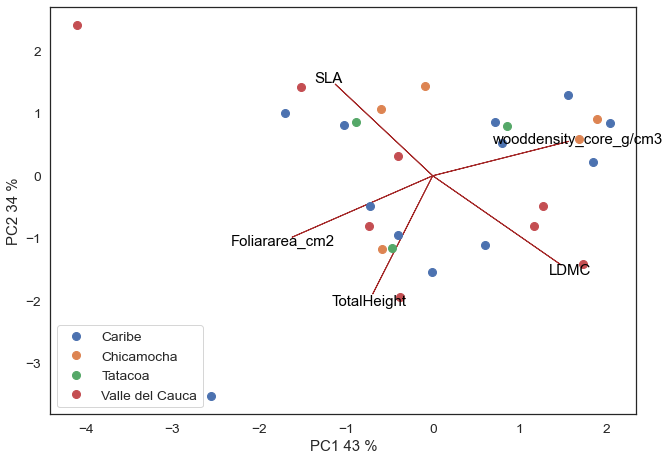

In [19]:
#--------------------------------OBTENCIÓN DE LA NUEVA MATRIZ DE ESPECIES EN LOS DOS COMPONENTES-------------------------------#
#se convierte la matriz agrupada a una matrix normal (pandas dataframe)
M = Trait_matrix.reset_index()
def cpdata(cp, Variables):
    Axis = []
    for index, rows in M.iterrows(): 
        Axis . append(rows[Variables].dot(PC[cp-1]))
    #Axis = pandas.Series(Axis).values
    return Axis

T= pandas.DataFrame({"PC1":cpdata( Variables = traits, cp = 1),"PC2":cpdata( Variables = traits, cp = 2)})

T = T.join(M[[treatment,species]])

#Datos atípicos
#T = T.drop(T[(T[treatment] != "La Pintada")])# & (T[(T[treatment] != "Santa Marta")]) & (T[(T[treatment] != "ZAMBRANO")])
#T = T.drop
#T = T.drop
#T=T[T[treatment] == "La Pintada" | T[treatment] == "Santa Marta" | T[treatment] == "ZAMBRANO" ]
#print(T[T[treatment] == "La Pintada" | T[treatment] == "Santa Marta"])#,"Santa Marta","ZAMBRANO"]])                                                                        
            
#T = T.drop(T[(T[treatment] == "Caribe") & (T[species] == "Swietenia macrophylla")].index)

#Se establecen los indices
T = T.set_index(species)
T.to_csv("out_tables\species_scores.csv")

#----------------------------------GRAFICO DE LOS VECTORES PROPIOS Y DE LAS ESPECIES----------------------------------#
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
import seaborn as sn
sn.set()

def Trait_plot():

    plt.xlabel("PC{} ".format(1)+str(round(perct[0].real))+" %") #Nombre del eje x
    plt.ylabel("PC{} ".format(2)+str(round(perct[1].real))+" %") #Nombre del eje y
    if treatment != "":
        for i,j in T.groupby(treatment): plt.plot(j["PC1"] ,j["PC2"],'o',markersize=8)
        
        #leyenda por tratamientos
        global treatments
        treatments = M[treatment].unique()
        plt.legend(treatments) 

    else: plt.plot(T["PC1"] ,T["PC2"],'o',markersize=8)
            
    global fig
    fig = plt.gcf()
    fig.set_size_inches(10.5, 7.5)
    return fig, plt.gca().lines[-1].get_color()

#se grafican los vectores propios
def d_vectors():
    for i in range(vects.shape[0]):
        plt.arrow(0, 0, vects[i,0]*3, vects[i,1]*3,color = 'brown')
        plt.text(vects[i,0]* 3.2, vects[i,1] * 3.2, traits[i], color = 'black', ha = 'center', va = 'center')

sn.set(font_scale=1.25)
sn.set_style("white")
d_vectors()
fig,cor= Trait_plot()

#Se guardan las graficas que se obtienen
fig.savefig('out_graphics\PCA.graphics.png', dpi=100)

Este gráfico sería entonces el principal producto de un anális que busca definir las estrategias funcionales de las especies. Cada punto es una especie y los colores indican la región en la que se midieron (podría evaluarse si los rasgos de la misma especie en diferentes sitios varia).

Como se observan en las lineas que grafican la relación de las variables/rasgos en el espacio multifuncional, existe una relación entre los diferentes rasgos de las especies. Estos patrón es ampliamente reportado y establece que existen rasgos como el area foliar y el area foliar específica (rasgos indicadores de crecimiento y altas tasas fotosintéticas) se relacionan de manera negativa con la densidad de madera y el contenido foliar de materia seca (que son ragos indicadores de la biomasa acumulada). Este patron establece ese espectro entre especies conservativas y adquisitivas ([Diaz *et al* 2004](https://onlinelibrary.wiley.com/doi/10.1111/j.1654-1103.2004.tb02266.x)). Según el gráfico vemos que existen especies distribuidas en todo el espectro, es decir que encontramos especies que no podrian clasificarse en los extremos de este espectro funcional.

## Análisis de diversidad
Para saber exactamente cómo es esta diversidad en términos de riqueza, lo ideal es evaluar el area que ocupa cada comunidad dentro de este espacio. Para esto se realiza un Convex Hull entre los datos de cada tratamiento y se evalua el volumen que ocupa dentro de este universo multirasgo. 

### Cálculo índices de diversidad Funcional (Riqueza funcional)
1. Se usa la función `ConvexHull` de  la librería `scipy.spatial` para encontrar el convex hull de cada comunidad
>Con los vertices que se obtienen, se grafican los polígonos que muestran la riqueza funcional de manera gráfica
1. Se usa el método `ConvexHull.area` para calcular el área de este convex Hull y obtener el valor de Riqueza funcional en una tabla

,BioRegion,FRichness
0,Caribe,14.980861
1,Chicamocha,8.164178
2,Tatacoa,6.140293
3,Valle del Cauca,15.061825
4,Total,19.599669


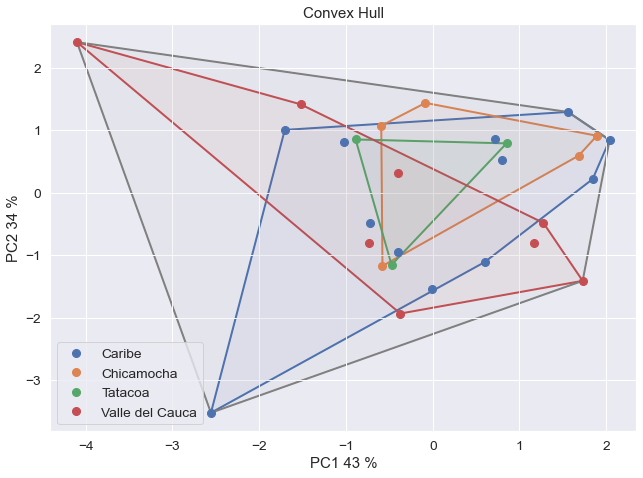

In [59]:
def FRichness(points,p=None): #Está función determina el ConvexHull de un conjunto de puntos
    
    #Se obtienen las dos columnas de interés y se convierten a una matriz numérica (numpy)
    points = points[["PC1","PC2"]]
    points =  points.values 
    
    #La función ConvexHull halla el ConvexHull
    hull = ConvexHull(points)  
    
    #Una etiqueta para cada tratamiento
    if p == None:  
        labeli="Total"
        cor = "gray"
    else: labeli = treatments[p]
    
    #Se obtienen solo los vertices del CovexHull
    circular_hull_verts = np.append(hull.vertices,hull.vertices[0])
    
    #Se grafica cada tratamiento (con una etiqueta para luego colocar en la leyenda)
    if not p==None:   
        plt.plot(points[:,0] ,points[:,1],'o',markersize=8, label =labeli) 
        cor = plt.gca().lines[-1].get_color()
        
    
    #Se grafican las lineas entre esos vertices
    plt.plot(points[:,0][circular_hull_verts], points[:,1][circular_hull_verts], lw=2, zorder=-1,
                    c=cor) #para que tengan el mismo color

    #Se rellena este ConvexHull
    plt.fill(points[hull.vertices,0], points[hull.vertices,1], alpha=0.05,
                 c=cor) #Para que tengan el mismo como
    
    return hull.area #La Riqueza funcional de la comunidad (tratamiento) será el area del Covex Hull Calculado

R=[]
#Se llama la función de para cada tratamiento
if treatment != "":
    for t in range(len(treatments)):  R.append(FRichness(T[T[treatment] == treatments[t]],t))
    plt.legend()
else: pass

#Propiedades del gráfico
#-----------------------
#Tamaño
figu = plt.gcf()
figu.set_size_inches(10.5, 7.5)
#Ejes
plt.xlabel("PC{} ".format(1)+str(round(perct[0].real))+" %") #Nombre del eje x
plt.ylabel("PC{} ".format(2)+str(round(perct[1].real))+" %") #Nombre del eje y
plt.title("Convex Hull")
#leyenda del gráfico

#Se guardan las graficas que se obtienen
sn.set_style("white")
sn.set(font_scale=1.25)
figu.savefig('out_graphics\PCA_ConvexHull.png', dpi=100)

#Se almacena el índice calculado
Div = pandas.DataFrame({treatment:treatments,"FRichness":R})
Div.loc[t+1]=["Total"]+[FRichness(T)]
Div.to_csv("out_tables\Div_indices.csv")
Div

Como puede verse, hay comunidades muy diversas (Caribe y Valle del Cauca) y comunidades no tan diversas (Tatacoa y Chicamocha). Esto puede estar afectado en términos del muestreo. Para comparar estos valores de riqueza es necesario comparar con simulaciones cuál sería la máxima riqueza esperada en las comunidades  ([Villeger *et al.* 2008](https://pdfs.semanticscholar.org/5332/b3fdf96579d1e33e853046803f1233286a59.pdf)).

## La densidad de probabilidad de los rasgos
Ahora bien, entender como se distribuyen estas estrategias es importante para saber lo que existe en la comunidad. Sin embargo, la abundancia es esencial para entender la estructura de las comunidades y así entender la verdadera relación de la diversidad con los procesos y servicios.

### Gráficos de los modelos de probabilidad de rasgos
Esta densidad reconoce el lugar de las estrategias más abundantes de la comunidad
1. La libería `seaborn` tiene una función que grafica directamente las areas cuya abundancia es mayor dependiendo de la posición de las especies (Se utiliza el argumento `weights` para definir el peso de cada especie).
> Hay que unir la matriz de abundancia a la matriz de datos en los componentes.
2. Para ver las diferencias entre incluir la abundancia en los estudios de diversidad, se muestran dos gráficos: el primero sin ponderación por abundancias y el segundo teniendo en cuenta la abundancia de las especies

C:\Users\juanp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\juanp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


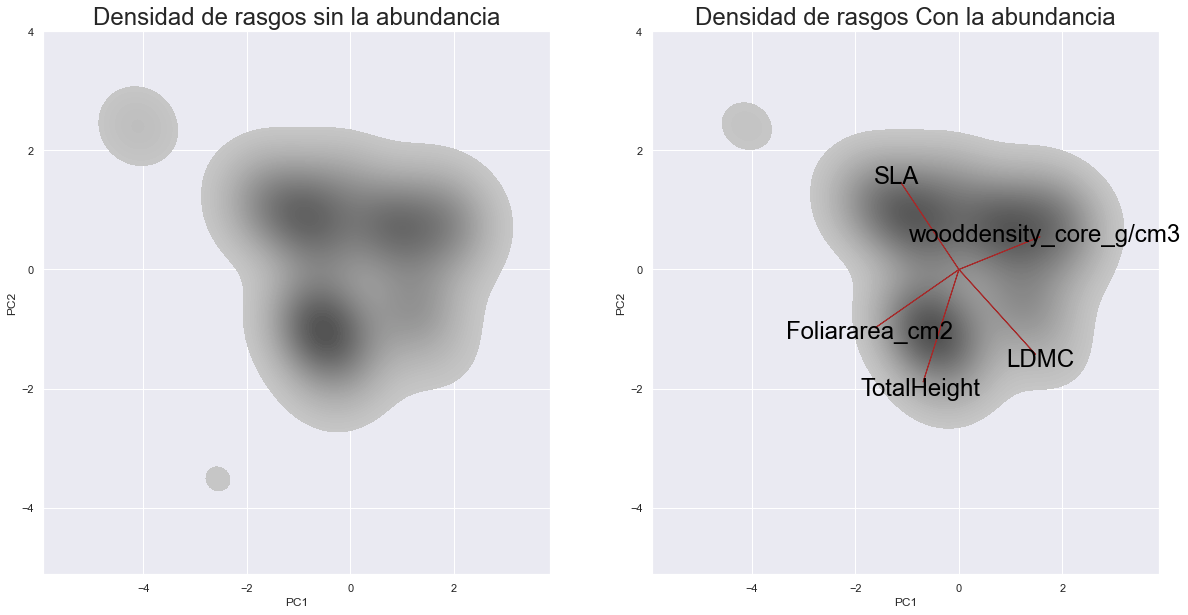

In [60]:
import seaborn as sn
sn.set()

TPD = T.join(Abun_matrix[abundance])

fig, axes = plt.subplots(1, 2,figsize=(20,10))
sn.set(font_scale=2)
axes[0].set_title("Densidad de rasgos sin la abundancia")
axes[1].set_title("Densidad de rasgos Con la abundancia")

sn.kdeplot(TPD["PC1"],TPD["PC2"],ax = axes[1],weights=TPD[abundance]
           ,shade=True,n_levels=100, color ="w")
sn.kdeplot(TPD["PC1"],TPD["PC2"],ax = axes[0]
           ,shade=True,n_levels=100, color ="w")
d_vectors()

sn.set_style("white")
fig.savefig('out_tables\Trait_Probability_Densitiy.png', dpi=100)

Aqui se puede ver que las diferencias son pocas. No obstante se puede ver que cuando se tiene en cuenta las abundancias, las especies con rasgos más distantes no tiene una gran abundancia y por tanto ecológicamente no participarían en procesos importantes como la captura de biomasa (un proceso que se ha relacionado más con las especies realmente dominantes). 

Esto relacionandolo con las relaciones de los rasgos demuestra que la mayor cantidad de especies se presentan estrategias adquisitivas (altos valores de SLA y Foliararea) y conservativas (altos valores de densidad de madera). Estas estrategias pueden escalarse y usarse para definir los servicios que presentan estas comunidades de arboles.

Aún faltan otros índices por calcular y que pueden caracterizar de mejor manera la diversidad funcional de las comunidades biológicas.